<a href="https://colab.research.google.com/github/Aditikabra20/machine-learning/blob/sml/Polynomial_Regression_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests

In [0]:
# web url for scarping
response=requests.get('https://sports.ndtv.com/cricket/players/857-rohit-sharma-playerprofile/stats')

In [3]:
response

<Response [200]>

In [0]:
#text data
#response.text

In [0]:
from bs4 import BeautifulSoup

In [0]:
soup=BeautifulSoup(response.text,'html5lib')
#                   text           parser

In [7]:
#require data
data=soup.find_all('div',{"data-id":'2'})
data

[<div class="mod-body lastfive" data-id="2">
 <div class="score-board batting">
 </div>
 <table border="0" cellpadding="0" cellspacing="0" width="100%">
 <tbody>
 <tr>
 <th scope="col">
 Batting
 </th>
 <th scope="col">
 Bowling
 </th>
 <th scope="col">
 Opposition
 </th>
 <th scope="col">
 Match Date
 </th>
 </tr>
  <tr>
 <td>
 103(94)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Sri Lanka
 </td>
 <td>
 Jul 06, 2019
 </td>
 </tr>
  <tr>
 <td>
 104(92)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Bangladesh
 </td>
 <td>
 Jul 02, 2019
 </td>
 </tr>
  <tr>
 <td>
 102(109)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> England
 </td>
 <td>
 Jun 30, 2019
 </td>
 </tr>
  <tr>
 <td>
 18(23)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> West Indies
 </td>
 <td>
 Jun 27, 2019
 </td>
 </tr>
  <tr>
 <td>
 1(10)  
 </td>
 <td>
  - 
 </td>
 <td>
 <span class="sm-cap">v</span> Afghanistan
 </td>
 <td>
 Jun 22, 2019
 </td>
 </t

In [0]:
require_data=[]
for divtag in soup.find_all('div',{"data-id":'2'}):
  for trtag in divtag.find_all('td'):
    require_data.append(trtag.get_text())

In [9]:
require_data

['\n103(94)  \n',
 '\n - \n',
 '\nv Sri Lanka\n',
 '\nJul 06, 2019\n',
 '\n104(92)  \n',
 '\n - \n',
 '\nv Bangladesh\n',
 '\nJul 02, 2019\n',
 '\n102(109)  \n',
 '\n - \n',
 '\nv England\n',
 '\nJun 30, 2019\n',
 '\n18(23)  \n',
 '\n - \n',
 '\nv West Indies\n',
 '\nJun 27, 2019\n',
 '\n1(10)  \n',
 '\n - \n',
 '\nv Afghanistan\n',
 '\nJun 22, 2019\n']

In [0]:
#create list
list=[]
for i in require_data:
  x=i.replace('\n',' ')
  list.append(x)

In [12]:
list

[' 103(94)   ',
 '  -  ',
 ' v Sri Lanka ',
 ' Jul 06, 2019 ',
 ' 104(92)   ',
 '  -  ',
 ' v Bangladesh ',
 ' Jul 02, 2019 ',
 ' 102(109)   ',
 '  -  ',
 ' v England ',
 ' Jun 30, 2019 ',
 ' 18(23)   ',
 '  -  ',
 ' v West Indies ',
 ' Jun 27, 2019 ',
 ' 1(10)   ',
 '  -  ',
 ' v Afghanistan ',
 ' Jun 22, 2019 ']

In [13]:
run_ball_list=[list[0],list[4],list[8],list[12],list[16]]
run_ball_list


[' 103(94)   ', ' 104(92)   ', ' 102(109)   ', ' 18(23)   ', ' 1(10)   ']

In [14]:
bowllist=[list[1],list[5],list[9],list[13],list[17]]
bowllist

['  -  ', '  -  ', '  -  ', '  -  ', '  -  ']

In [15]:

opposite_team_list=[list[2],list[6],list[10],list[14],list[18]]
opposite_team_list

[' v Sri Lanka ',
 ' v Bangladesh ',
 ' v England ',
 ' v West Indies ',
 ' v Afghanistan ']

In [16]:
datelist=[list[3],list[7],list[11],list[15],list[19]]
datelist

[' Jul 06, 2019 ',
 ' Jul 02, 2019 ',
 ' Jun 30, 2019 ',
 ' Jun 27, 2019 ',
 ' Jun 22, 2019 ']

In [0]:
import pandas as pd

In [18]:
df=pd.DataFrame({'Batting':run_ball_list,'Bowling':bowllist,'Opposition':opposite_team_list,'MatchDate':datelist})
df

,Batting,Bowling,Opposition,MatchDate
0,103(94),-,v Sri Lanka,"Jul 06, 2019"
1,104(92),-,v Bangladesh,"Jul 02, 2019"
2,102(109),-,v England,"Jun 30, 2019"
3,18(23),-,v West Indies,"Jun 27, 2019"
4,1(10),-,v Afghanistan,"Jun 22, 2019"


In [0]:
import numpy as np

In [20]:
x=df.iloc[:,0].values
x

array([' 103(94)   ', ' 104(92)   ', ' 102(109)   ', ' 18(23)   ',
       ' 1(10)   '], dtype=object)

In [21]:
#split data
x[0].split('(')[0]

' 103'

In [0]:
run=[]
for i in x:
  run.append(i.split('(')[0])
  

In [23]:
run

[' 103', ' 104', ' 102', ' 18', ' 1']

In [24]:
#split data
x[0].split('(')[1].replace(')',' ')

'94    '

In [0]:
ball=[]
for i in x:
  ball.append(i.split('(')[1].replace(')',' '))
  

In [26]:
ball

['94    ', '92    ', '109    ', '23    ', '10    ']

In [28]:
df=pd.DataFrame({'Batting':run_ball_list,'Bowling':bowllist,'Opposition':opposite_team_list,'MatchDate':datelist,'Run':run,'Ball':ball})
df

,Batting,Bowling,Opposition,MatchDate,Run,Ball
0,103(94),-,v Sri Lanka,"Jul 06, 2019",103,94
1,104(92),-,v Bangladesh,"Jul 02, 2019",104,92
2,102(109),-,v England,"Jun 30, 2019",102,109
3,18(23),-,v West Indies,"Jun 27, 2019",18,23
4,1(10),-,v Afghanistan,"Jun 22, 2019",1,10


#**linear regression**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
#call linear regression
regr=LinearRegression()

In [0]:
#run
r=df.iloc[:,4:5].values
r=r.astype(int)

In [0]:
#ball
b=df.iloc[:,5].values
b=b.astype(int)

In [0]:
#trained data
trained=regr.fit(r,b)

In [34]:
b

array([ 94,  92, 109,  23,  10])

In [0]:
import matplotlib.pyplot as plt

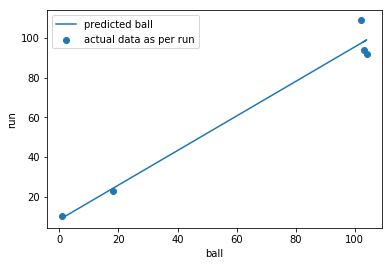

In [36]:
plt.xlabel("ball")
plt.ylabel("run")
plt.scatter(r,b,label="actual data as per run")
plt.plot(r,trained.predict(r),label="predicted ball")
plt.legend()
plt.show()

In [0]:
e